In [48]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-07-16 01:19:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.80, 34.64.4.16, 34.64.4.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: `/tmp/cats_and_dogs_filtered.zip'

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  16.0MB/s    in 4.1s    

2021-07-16 01:19:37 (16.0 MB/s) - `/tmp/cats_and_dogs_filtered.zip' saved [68606236/68606236]



In [49]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

# validation, train directory 설정 후 
#### train_dir 안에 cats, dogs
#### validation_dir 안에 cats, dogs

In [50]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [51]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.952.jpg', 'cat.946.jpg', 'cat.6.jpg', 'cat.749.jpg', 'cat.991.jpg', 'cat.985.jpg', 'cat.775.jpg', 'cat.761.jpg', 'cat.588.jpg', 'cat.239.jpg']
['dog.775.jpg', 'dog.761.jpg', 'dog.991.jpg', 'dog.749.jpg', 'dog.985.jpg', 'dog.952.jpg', 'dog.946.jpg', 'dog.211.jpg', 'dog.577.jpg', 'dog.563.jpg']


#### train 속 cat, dog 이미지 갯수 확인하기, 
#### validation 속 cat, dog 이미지 갯수 확인하기, 

In [52]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

('total training cat images :', 1000)
('total training dog images :', 1000)
('total validation cat images :', 500)
('total validation dog images :', 500)


In [53]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows=4
ncols=4


pic_index = 0

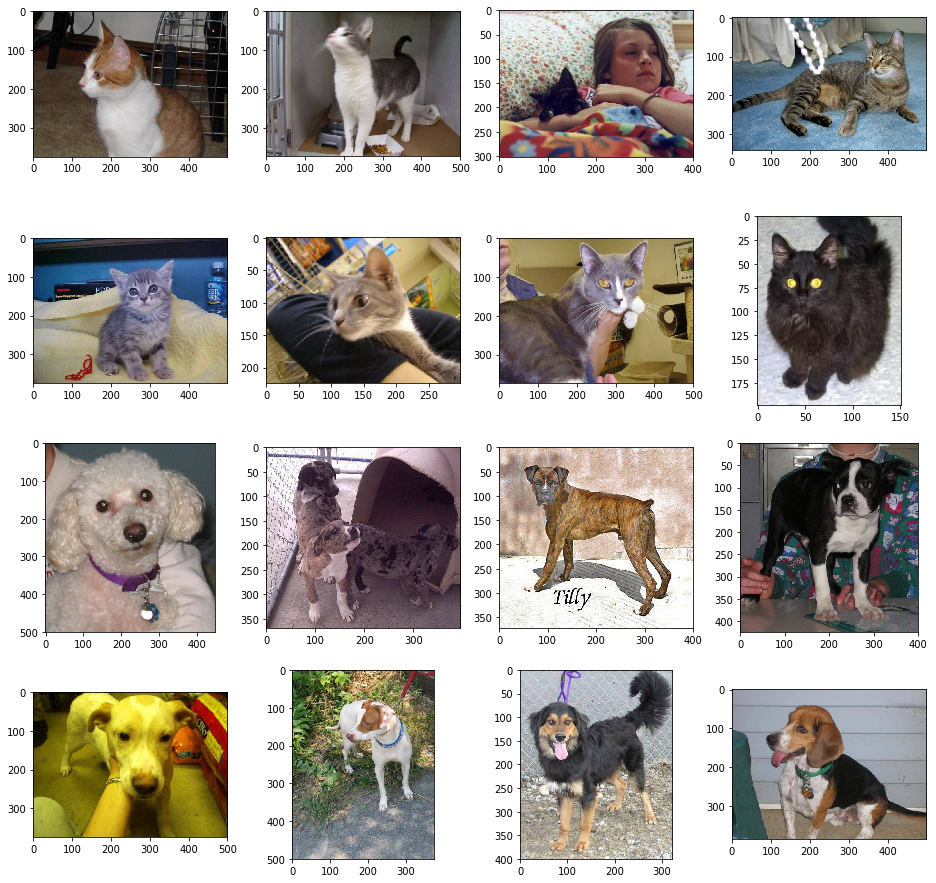

In [54]:
fig = plt.gcf()
fig.set_size_inches (ncols*4, nrows*4)
pic_index+=8
next_cat_pix = [os.path.join(train_cats_dir, fname)
               for fname in train_cat_fnames[pic_index-8:pic_index]
               ]
# pic_index-4 라는 것은, 이미지를 4개 불러 온다는 의미인 것이다. 
#-8 이 되게 되면 8개를 뽑아 낸다. 
next_dog_pix = [os.path.join(train_dogs_dir, fname)
               for fname in train_dog_fnames[pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
      # Set up subplot; subplot indices start at 1

    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('On')
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

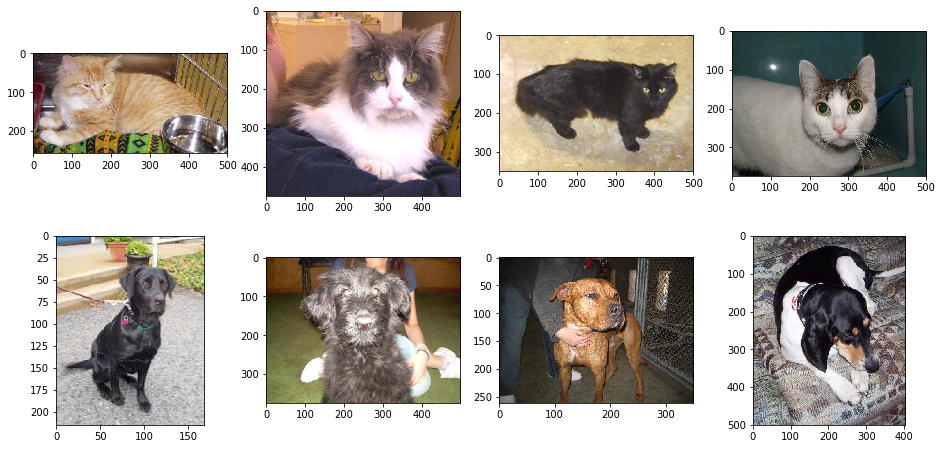

In [55]:
fig = plt.gcf()
fig.set_size_inches (ncols*4, nrows*4)
pic_index+=8
next_cat_pix = [os.path.join(train_cats_dir, fname)
               for fname in train_cat_fnames[pic_index-4:pic_index]
               ]
# pic_index-4 라는 것은, 이미지를 4개 불러 온다는 의미인 것이다. 
#-8 이 되게 되면 8개를 뽑아 낸다. 
next_dog_pix = [os.path.join(train_dogs_dir, fname)
               for fname in train_dog_fnames[pic_index-4:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
      # Set up subplot; subplot indices start at 1

    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('On')
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [56]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

# configuration for model training, model.compile

In [57]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(lr = 0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

# data preprocessing : ImageDataGenerator 사용

#### rescale
#### batch_size, class_mode, target_size


In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#rescale
train_datagen = ImageDataGenerator( rescale = 1.0/255.)
test_datagen = ImageDataGenerator ( rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                   batch_size = 20,
                                                   class_mode = 'binary',
                                                   target_size = (150,150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                             batch_size = 20,
                                                             class_mode = 'binary',
                                                             target_size = (150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# training, model.fit

2,000개의 이미지를 train 하게 될 것이고, 15epochs, validate on 1000 test image. 

# 정확하게 이게 뭐지.. steps_per_epoch 가 뭐지? 


In [59]:
history = model.fit(train_generator, 
                   validation_data = validation_generator, 
                   steps_per_epoch =100, #batch_size x steps_per_epoch = 2000 image
                   epochs = 15, 
                   validation_steps = 50,
                   verbose = 2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 - 25s - loss: 0.7660 - accuracy: 0.5740 - val_loss: 1.0542 - val_accuracy: 0.5070
Epoch 2/15
100/100 - 23s - loss: 0.6282 - accuracy: 0.6750 - val_loss: 0.6031 - val_accuracy: 0.6890
Epoch 3/15
100/100 - 22s - loss: 0.5550 - accuracy: 0.7285 - val_loss: 0.5950 - val_accuracy: 0.6860
Epoch 4/15
100/100 - 24s - loss: 0.4821 - accuracy: 0.7680 - val_loss: 0.5839 - val_accuracy: 0.7200
Epoch 5/15
100/100 - 24s - loss: 0.4041 - accuracy: 0.8195 - val_loss: 0.6546 - val_accuracy: 0.6780
Epoch 6/15
100/100 - 24s - loss: 0.3175 - accuracy: 0.8670 - val_loss: 0.8192 - val_accuracy: 0.6760
Epoch 7/15
100/100 - 22s - loss: 0.2357 - accuracy: 0.9005 - val_loss: 0.7926 - val_accuracy: 0.6960
Epoch 8/15
100/100 - 24s - loss: 0.1661 - accuracy: 0.9305 - val_loss: 1.1316 - val_accuracy: 0.6910
Epoch 9/15
100/100 - 23s - loss: 0.1488 - accuracy: 0.9595 - val_loss: 1.0322 - val_accuracy: 0.693

In [60]:
history = model.fit(train_generator, 
                   validation_data = validation_generator, 
                   steps_per_epoch =10,
                   epochs = 15, 
                   validation_steps = 50,
                   verbose = 2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 50 steps
Epoch 1/15
10/10 - 5s - loss: 0.0078 - accuracy: 1.0000 - val_loss: 2.2266 - val_accuracy: 0.6890
Epoch 2/15
10/10 - 6s - loss: 0.0687 - accuracy: 0.9850 - val_loss: 1.9840 - val_accuracy: 0.6810
Epoch 3/15
10/10 - 5s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 2.1248 - val_accuracy: 0.6970
Epoch 4/15
10/10 - 5s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.2769 - val_accuracy: 0.6960
Epoch 5/15
10/10 - 6s - loss: 0.1956 - accuracy: 0.9600 - val_loss: 1.8668 - val_accuracy: 0.6940
Epoch 6/15
10/10 - 5s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.9918 - val_accuracy: 0.7000
Epoch 7/15
10/10 - 6s - loss: 0.0048 - accuracy: 1.0000 - val_loss: 2.0876 - val_accuracy: 0.6960
Epoch 8/15
10/10 - 5s - loss: 7.6361e-04 - accuracy: 1.0000 - val_loss: 2.0899 - val_accuracy: 0.6990
Epoch 9/15
10/10 - 5s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.1245 - val_accuracy: 0.7060
Epoch 10/15
10/10 - 5s

# Visualizing intermediate representations
layer 들을 지난다음에 결과값을 이제 보게 될 것이다. 
# model.layers 라는 api 는, 
image 에 가해지는 convolution 으로 인한 영향을 확인할 수 잇게 해 주는 것이다. 

/Users/hhi/opt/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in divide


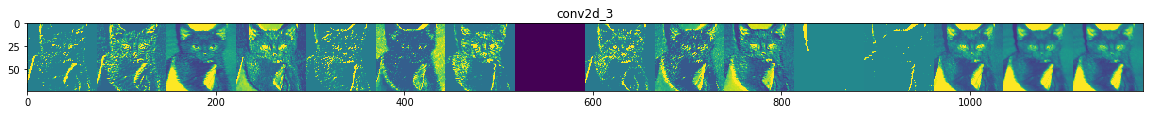

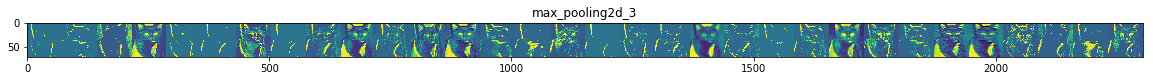

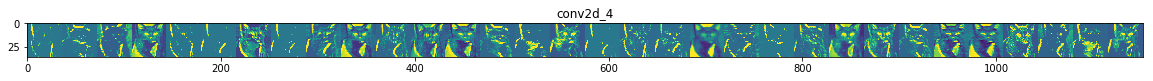

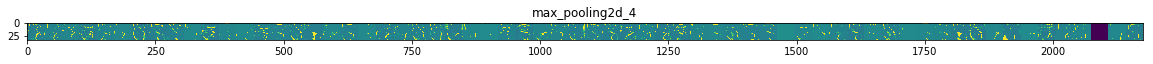

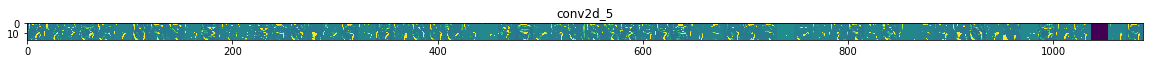

In [61]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

# train_acc , val_acc
train_acc 가 엄청 높지만 val_acc 은 상당히 낮은 것을 볼 수 있다. 
이로 인해서 valdiation 이 굉장히 중요함을 알 수 있을 것이다. 

Text(0.5,1,'Training and validation loss')

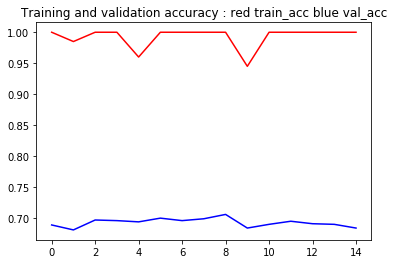

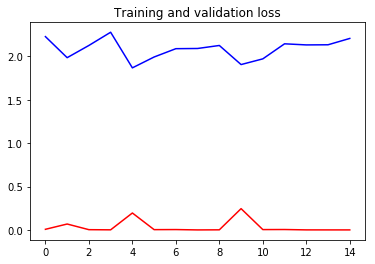

In [62]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc,'r' )
plt.plot  ( epochs, val_acc,'b' )
plt.title ('Training and validation accuracy : red train_acc blue val_acc')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss,'r' )
plt.plot  ( epochs, val_loss,'b' )
plt.title ('Training and validation loss'   )